In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [58]:
# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [59]:
# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


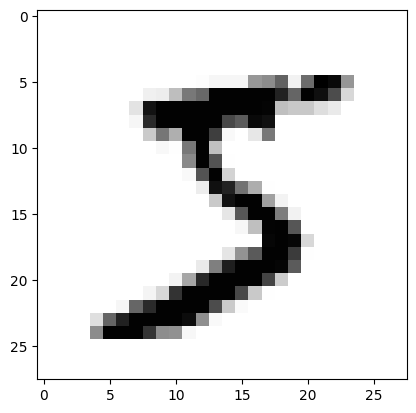

In [60]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [61]:
X_train[0].shape

(28, 28)

In [62]:
# X_train[0]

In [63]:
import sys

In [64]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [65]:
X_train.shape

(60000, 28, 28)

In [66]:
X_train.shape[0]

60000

In [67]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train.shape
# (60000, 28, 28) => (60000, 784)

(60000, 784)

In [68]:
X_train = X_train.astype('float64')
X_train = X_train / 255 # 0~1 사이로 변환

In [69]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [70]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255
# X_test (10000, 784)로 reshape -> 타입 float로변경, /255

In [71]:
# 선형회귀모델처럼 0~255는 차이가 너무큼, 0~1로 변환
# 변환 안해도 되지만 성능이 기대보다 낮게 나옴

In [72]:
# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0]))

class : 5 


In [73]:
y_train[59999]

8

In [74]:
# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [75]:
# MNIST 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [76]:
# DNN 딥러닝 구조로 이미지 분류 모델

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [78]:
import os

In [79]:
model = Sequential()

In [80]:
model.add(Dense(512, input_dim=784, activation='relu')) # 784 : 28*28
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 2진분류면 binary_crossentropy

In [83]:
modelpath="MNIST_MLP.hdf5"

In [84]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [85]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [87]:
# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss did not improve from 0.08839

Epoch 2: val_loss did not improve from 0.08839

Epoch 3: val_loss did not improve from 0.08839

Epoch 4: val_loss did not improve from 0.08839

Epoch 5: val_loss did not improve from 0.08839

Epoch 6: val_loss did not improve from 0.08839

Epoch 7: val_loss did not improve from 0.08839

Epoch 8: val_loss did not improve from 0.08839

Epoch 9: val_loss did not improve from 0.08839

Epoch 10: val_loss did not improve from 0.08839

Epoch 11: val_loss did not improve from 0.08839

Epoch 12: val_loss did not improve from 0.08839


In [88]:
# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0843 - accuracy: 0.9821

 Test Accuracy: 0.9821


In [89]:
# CNN 딥러닝 구조로 이미지 분류 모델

In [90]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [91]:
# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255 # 흑백으로 나타냄, 컬러면 1을 3으로 변경
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [92]:
X_train[0].shape

(28, 28, 1)

In [93]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) # 일반적으로 (3,3) or (5,5)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # 일반적으로 (2,2)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [94]:
# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [95]:
modelpath="MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [96]:
# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/30
225/225 [==============================] - ETA: 0s - loss: 0.3448 - accuracy: 0.8947
Epoch 1: val_loss improved from inf to 0.08614, saving model to MNIST_CNN.hdf5
225/225 [==============================] - 141s 624ms/step - loss: 0.3448 - accuracy: 0.8947 - val_loss: 0.0861 - val_accuracy: 0.9758
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 [==============================] - ETA: 0s - loss: 0.1040 - accuracy: 0.9687

KeyboardInterrupt: 

In [ ]:
# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

In [ ]:
# 히든 계층 1~2개 더 추가
# 출력 차원을 변경해가면서 성능 비교

# 보통 2의 n승 형태로 많이 줌
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) # softmax 총 결과 예측확률이 1, 제일 높은 값으로 예측
# 일반적으로 다중분류 : softmax, 이진분류 : sigmoid
# softmax로 이진분류도 가능, Dense(2, activation='softmax')로 바뀌어야 됨 yes =>1 no => 0 등으로 one-hot encoding 되어있어야됨

# Conv2D 레이어는 주로 이미지와 같은 2차원 데이터에 사용, 이 레이어를 통해 이미지의 지역적인 패턴을 학습
# Conv2D 레이어는 주로 이미지 분류, 객체 탐지 등의 문제에 사용
# Dense 레이어는 모든 입력 뉴런과 출력 뉴런이 서로 연결되어 있으며, 이 레이어는 일반적으로 모델의 마지막 부분에 위치하여 최종 예측을 수행
# Dense 레이어는 이미지 분류, 텍스트 분류, 회귀 문제 등 다양한 종류의 문제에 사용

In [97]:
# CNN 딥러닝 구조로 이미지 분류 모델

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [99]:
# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
# 로이터 뉴스 전체에 등장하는 단어들 중에서 가장 빈도가 높은 1000개의 단어만 사용

In [100]:
X_train
len(X_train)

8982

In [101]:
len(X_test)

2246

In [102]:
y_train
len(y_train) # 8982
np.unique(y_train) # 0~45 : 뉴스카테고리

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [103]:
print(X_train[0]) # 로이터 뉴스 기사에 등장하는 영어 단어 -> 인코딩(수치형으로 변환)

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [104]:
print(y_train[0]) # 로이터 뉴스 기사 카테고리 -> 인코딩

3


In [105]:
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

# ex
# 뉴스기사
# 오늘은 날씨가 흐립니다. 오후 내내 비가 내릴 예정입니다.
# => 3(오늘), 7(날씨), 23(흐림), 예정, ...-> 순위에 없으면 x
# 카테고리
# 5(날씨)

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [106]:
# LSTM
# 입출력 구조 : 1:1, 1:다, 다:1, 다:다
# 여러개 입력단어(다) : 분류결과(1)
# 길이 동일하게 맞춰야 함

In [111]:
len(X_train[0]) # 87
len(X_train[1]) # 56
# X_train에 저장된 데이터의 최대 길이를 출력
max_len_train = max(len(x) for x in X_train)
max_len_train

2376

In [ ]:
# 다른 방법1
max(map(len, X_train))
# 다른 방법2
max_len, idx = 0, 0
for i, k in enumerate(X_train):
    if max_len < len(k):
        max_len = len(k)
        idx = i
print(max_len, idx)

In [114]:
# 임의로 길이 지정해서 진행

In [115]:
# 단어의 수를 맞추어 줍니다. zero-padding, 빈자리는 0으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [119]:
# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [122]:
model = Sequential()
model.add(Embedding(1000, 200)) # Embedding 1000차원의 단어 벡터 공간 -> 임베딩 -> 200차원 벡터 공간
model.add(LSTM(100, activation='tanh')) # LSTM 100 차원으로 출력
model.add(Dense(46, activation='softmax')) # 46차원으로 출력, 46개의 확률로 나옴

In [117]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   2,   2,   8,  43,  10, 447,   5,  25, 207, 270,   5,   2,
       111,  16, 369, 186,  90,  67,   7,  89,   5,  19, 102,   6,  19,
       124,  15,  90,  67,  84,  22, 482,  26,   7,  48,   4,  49,   8,
       864,  39, 209, 154,   6, 151,   6,  83,  11,  15,  22, 155,  11,
        15,   7,  48,   9,   2,   2, 504,   6, 258,   6, 272,  11,  15,
        22, 134,  44,  11,  15,  16,   8, 197,   2,  90,  67,  52,  29,
       209,  30,  32, 132,   6, 109,  15,  17,  12], dtype=int32)

In [118]:
X_train[8981]

array([125,   2,  21,   4,   2,  76,   7,   4, 757, 481,   2, 790,   2,
         2,   9, 111, 149,   8,   7,  10,  76, 223,  51,   4, 417,   8,
         2,  91,   2,   2, 340,   7, 194,   2,   6,   2,  21, 127,   2,
         2,   2,   6,   2,   4, 329, 433,   7,  65,  87,   2,  10,   2,
         2, 290,   9,  21, 567,  16,   2,  24,   4,  76, 209,  30,   2,
         2,   2,   8,   4,  60,   8,   4, 966, 308,  40,   2, 129,   2,
       295, 277,   2,   9,  24, 286,   2, 234, 222,   9,   4, 906,   2,
         2, 114,   2,   2,   7,   4, 113,  17,  12], dtype=int32)

In [123]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])
# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
450/450 [==============================] - 66s 142ms/step - loss: 2.1372 - accuracy: 0.4580 - val_loss: 1.7931 - val_accuracy: 0.5392
Epoch 2/200
450/450 [==============================] - 60s 134ms/step - loss: 1.6194 - accuracy: 0.5910 - val_loss: 1.5556 - val_accuracy: 0.6077
Epoch 3/200
450/450 [==============================] - 58s 129ms/step - loss: 1.3819 - accuracy: 0.6533 - val_loss: 1.3710 - val_accuracy: 0.6483
Epoch 4/200
450/450 [==============================] - 61s 136ms/step - loss: 1.2158 - accuracy: 0.6942 - val_loss: 1.3231 - val_accuracy: 0.6674
Epoch 5/200
450/450 [==============================] - 60s 134ms/step - loss: 1.0729 - accuracy: 0.7316 - val_loss: 1.1890 - val_accuracy: 0.7053
Epoch 6/200
450/450 [==============================] - 59s 132ms/step - loss: 0.9433 - accuracy: 0.7630 - val_loss: 1.1164 - val_accuracy: 0.7168
Epoch 7/200
450/450 [==============================] - 59s 131ms/step - loss: 0.8359 - accuracy: 0.7880 - val_loss: 1.1118 -